In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de la data

In [209]:
data = np.load('proyecto_training_data.npy').astype('float32')
dataset = pd.DataFrame(data, columns = ['SalesPrice','OverallQual','lstFirSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])
dataset

,SalesPrice,OverallQual,lstFirSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [210]:
type(dataset.loc[0, 'lstFirSF'])

numpy.float32

## Generación del modelo por gradientes

### Split de Sets Train y Test

In [211]:
# Variables X y Y para Prueba de la función
x = dataset['OverallQual'].values.reshape(-1, 1)
y = dataset['SalesPrice'].values.reshape(-1, 1)

In [212]:
import random
split = 0.8
nTrain = int(len(x)*split)
Indices = list(range(0, len(x)))
random.seed(123)
random.shuffle(Indices)
TrainSet_x = x[Indices[0 : nTrain]]
TestSet_x = x[Indices[nTrain : len(Indices)]]
TrainSet_y = y[Indices[0 : nTrain]]
TestSet_y = y[Indices[nTrain : len(Indices)]]

### Creación de la función

In [191]:
def GradDesc(X, Y, epoch, imprimir_error_cada, learning_rate):
    #parametros internos
    b0 = 0
    b1 = 0
    betas = np.array([b1,b0]) 
    n = len(X)
    
    #arrays iniciales
    errorArray = np.array([])
    betasArray = ([betas])
    
    #creacion de matriz con unos
    vect1 = np.ones_like(X)
    matriz = np.hstack([X, vect1])
    
    np.seterr(invalid='ignore')
    
    #loop
    for i in range(epoch):
        
        yhat = np.dot(matriz, betas).reshape(-1,1)
        
        error = np.sum(np.power(Y - yhat, 2))/(2*n)
        errorArray = np.append(errorArray, error)
        
        grads = np.sum((yhat-Y)*matriz,axis=0)*(1/n)
        
        betas = betas - learning_rate*grads
        betasArray = np.vstack([betasArray, betas])
        
        if (i+1) % imprimir_error_cada == 0:
            print('------------------------')
            print('iteracion {}'.format(i+1))
            print('error {}'.format(error))
            print('modelo b0: {}, b1: {}'.format(betas[1], betas[0]))
        else:
            pass
    return {'error': error, 'errorArray': errorArray, 'betas': betas, 'betasArray': betasArray}

In [213]:
X = TrainSet_x
Y = TrainSet_y

Modelo = GradDesc(X, Y, 50000, 10000, 0.01)

------------------------
iteracion 10000
error 1155517839.1261802
modelo b0: -97263.14357587117, b1: 45507.19329085135
------------------------
iteracion 20000
error 1155498259.9263356
modelo b0: -98153.09036901817, b1: 45645.66279870509
------------------------
iteracion 30000
error 1155498258.4322772
modelo b0: -98160.86447275669, b1: 45646.87239497193
------------------------
iteracion 40000
error 1155498258.4321632
modelo b0: -98160.93238320871, b1: 45646.88296136414
------------------------
iteracion 50000
error 1155498258.4321632
modelo b0: -98160.93297643853, b1: 45646.88305366656


In [214]:
Modelo['error']

1155498258.4321632

### Función para graficar error

In [45]:
def GrafError(errorArray, color, marker):
    iteraciones = np.arange(1, len(errorArray)+1, 1)
    plt.plot(iteraciones, errorArray, color=color, marker=marker)
    plt.xlabel('iteraciones')
    plt.ylabel('error')

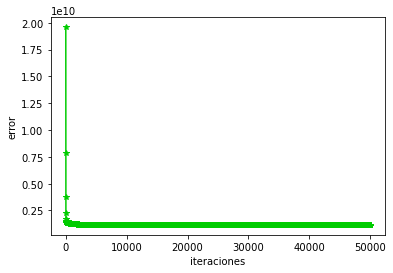

In [215]:
Arreglo_errores = Modelo['errorArray']
color = '#00cc00'
marcador = '*'

GrafError(Arreglo_errores, color, marcador)

### Función para graficar la evolución del modelo

In [47]:
def GrafEvolucion(X, n_grafica, epoch, betasArray):
    # Diccionario vacio para añadir las predicciones
    predDict = {}

    # Creacion de matriz de X para vectorizacion
    vect1 = np.ones_like(X)
    matriz = np.hstack([X, vect1])

    for i in range(n_grafica, epoch+1, n_grafica):
        y_pred_temp = np.dot(matriz, betasArray[i]).reshape(-1,1)
        predDict['iteracion {}'.format(i)] = y_pred_temp

    for k, v in predDict.items():
        plt.plot(X, v, '.-', label=k)
    plt.show()

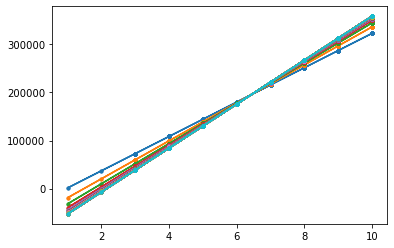

In [217]:
Arreglo_betas = Modelo['betasArray']

GrafEvolucion(X, 1000, 50000, Arreglo_betas)

## Entrenamiento de Modelos

### Modelo 1 - SalesPrice - OverallQual

In [236]:
x1 = dataset['OverallQual'].values.reshape(-1, 1)
y1 = dataset['SalesPrice'].values.reshape(-1, 1)

split = 0.8
nTrain = int(len(x1)*split)
Indices = list(range(0, len(x1)))
random.seed(123)
random.shuffle(Indices)
TrainSet_x1 = x1[Indices[0 : nTrain]]
TestSet_x1 = x1[Indices[nTrain : len(Indices)]]
TrainSet_y1 = y1[Indices[0 : nTrain]]
TestSet_y1 = y1[Indices[nTrain : len(Indices)]]

In [219]:
X1 = TrainSet_x1
Y1 = TrainSet_y1

Modelo1 = GradDesc(X1, Y1, 50000, 10000, 0.01)

------------------------
iteracion 10000
error 1155517839.1261802
modelo b0: -97263.14357587117, b1: 45507.19329085135
------------------------
iteracion 20000
error 1155498259.9263356
modelo b0: -98153.09036901817, b1: 45645.66279870509
------------------------
iteracion 30000
error 1155498258.4322772
modelo b0: -98160.86447275669, b1: 45646.87239497193
------------------------
iteracion 40000
error 1155498258.4321632
modelo b0: -98160.93238320871, b1: 45646.88296136414
------------------------
iteracion 50000
error 1155498258.4321632
modelo b0: -98160.93297643853, b1: 45646.88305366656


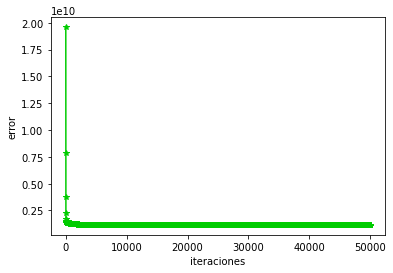

In [220]:
Arreglo_errores = Modelo1['errorArray']
color = '#00cc00'
marcador = '*'

GrafError(Arreglo_errores, color, marcador)

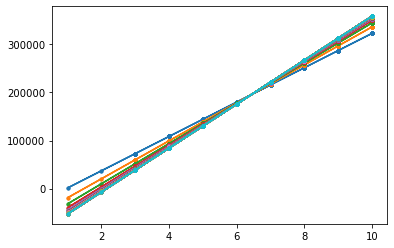

In [221]:
Arreglo_betas = Modelo1['betasArray']

GrafEvolucion(X, 1000, 50000, Arreglo_betas)

### Modelo 2 - SalesPrice - TotRmsAbvGrd

In [237]:
x2 = dataset['TotRmsAbvGrd'].values.reshape(-1, 1)
y2 = dataset['SalesPrice'].values.reshape(-1, 1)

split = 0.8
nTrain = int(len(x2)*split)
Indices = list(range(0, len(x2)))
random.seed(123)
random.shuffle(Indices)
TrainSet_x2 = x2[Indices[0 : nTrain]]
TestSet_x2 = x2[Indices[nTrain : len(Indices)]]
TrainSet_y2 = y2[Indices[0 : nTrain]]
TestSet_y2 = y2[Indices[nTrain : len(Indices)]]

In [223]:
X2 = TrainSet_x2
Y2 = TrainSet_y2

Modelo2 = GradDesc(X2, Y2, 50000, 10000, 0.01)

------------------------
iteracion 10000
error 2255375274.0446215
modelo b0: 10261.080701369774, b1: 26146.113063766654
------------------------
iteracion 20000
error 2255375259.1087246
modelo b0: 10283.777959288147, b1: 26142.83902530275
------------------------
iteracion 30000
error 2255375259.108534
modelo b0: 10283.858994915417, b1: 26142.82733605987
------------------------
iteracion 40000
error 2255375259.108534
modelo b0: 10283.859284235463, b1: 26142.827294325976
------------------------
iteracion 50000
error 2255375259.108534
modelo b0: 10283.85928526823, b1: 26142.827294176997


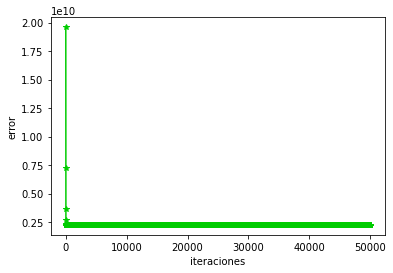

In [224]:
Arreglo_errores = Modelo2['errorArray']
color = '#00cc00'
marcador = '*'

GrafError(Arreglo_errores, color, marcador)

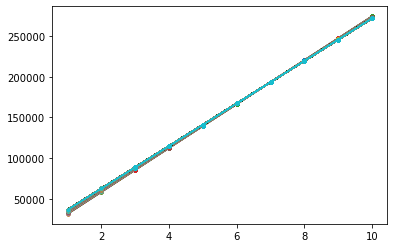

In [226]:
Arreglo_betas = Modelo2['betasArray']

GrafEvolucion(X, 100, 50000, Arreglo_betas)

## Modelo con Scikit-Learn

### Modelo 1 - SalesPrice - OverallQual

#### Split de Train y Test

In [239]:
x3 = dataset['OverallQual'].values.reshape(-1, 1)
y3 = dataset['SalesPrice'].values.reshape(-1, 1)
from sklearn.model_selection import train_test_split
dataTrain, dataTest, dataTrain_Sales, dataTest_Sales = train_test_split(x3, y3, test_size=0.3, shuffle=True, random_state=123)

#### Entrenamiento del modelo

In [240]:
from sklearn.linear_model import LinearRegression

lm_1 = LinearRegression()
lm_1.fit(dataTrain, dataTrain_Sales)
print(lm_1.coef_)
print(lm_1.intercept_)

[[44976.492]]
[-94032.17]


#### Prediccion

In [241]:
y_hat_skl = lm_1.predict(dataTrain)
y_hat_skl

array([[130850.3  ],
       [ 40897.297],
       [130850.3  ],
       ...,
       [220803.27 ],
       [130850.3  ],
       [175826.77 ]], dtype=float32)

### Modelo 2 SalesPrice - TotRmsAbvGrd

#### Split de Train y Test

In [242]:
x4 = dataset['TotRmsAbvGrd'].values.reshape(-1, 1)
y4 = dataset['SalesPrice'].values.reshape(-1, 1)
from sklearn.model_selection import train_test_split
dataTrain, dataTest, dataTrain_Sales, dataTest_Sales = train_test_split(x4, y4, test_size=0.3, shuffle=True, random_state=123)

#### Entrenamiento del modelo

In [243]:
from sklearn.linear_model import LinearRegression

lm_2 = LinearRegression()
lm_2.fit(dataTrain, dataTrain_Sales)
print(lm_2.coef_)
print(lm_2.intercept_)

[[25530.086]]
[13362.5625]


#### Prediccion

In [244]:
y_hat_skl = lm_2.predict(dataTrain)
y_hat_skl

array([[141013.  ],
       [166543.08],
       [141013.  ],
       ...,
       [243133.34],
       [141013.  ],
       [166543.08]], dtype=float32)

## Función para predicción

In [254]:
def PredTriple(X, betas_grad, modelo_skl):
    # Creación del vector para la función de gradientes
    vect1 = np.ones_like(X)
    matriz = np.hstack([X, vect1])

    # Predicciones en cada modelo
    ypred_grad = np.dot(matriz, betas_grad).reshape(-1,1)
    ypred_skl = modelo_skl.predict(X)
    ypred_prom = (ypred_grad + ypred_skl)/2

    # Arreglo con resultados
    result = np.array([ypred_grad, ypred_skl, ypred_prom])
    print(result)
    
    return result

### Error de los modelos

In [379]:
error_pred = np.sum(np.power(Y - result, 2), axis = 1)/(2*n)
print(error_pred)

[[3.20417345e+08]
 [3.20153908e+08]
 [3.20258657e+08]]


### Prediccion con Modelo 1

In [ ]:
X1_test = TestSet_x1
Y1_test = TestSet_y1

ArrBetas1 = Modelo1['betas']
Pred_modelo1 = PredTriple(X1_test, ArrBetas1, lm_1)
Pred_modelo1

In [258]:
n = len(Y1_test)
error_pred = np.sum(np.power(Y1_test - Pred_modelo1, 2), axis = 1)/(2*n)
print(error_pred)

[[1.28166938e+09]
 [1.28061558e+09]
 [1.28103460e+09]]


### Prediccion con Modelo 2

In [ ]:
X2_test = TestSet_x2
Y2_test = TestSet_y2

ArrBetas2 = Modelo2['betas']
Pred_modelo2 = PredTriple(X2_test, ArrBetas2, lm_2)
Pred_modelo2

In [260]:
n = len(Y2_test)
error_pred2 = np.sum(np.power(Y2_test - Pred_modelo2, 2), axis = 1)/(2*n)
print(error_pred2)

[[2.25425381e+09]
 [2.25579053e+09]
 [2.25480184e+09]]


## Conclusion

Después de realizar las predicciones utilizando para el Modelo 1 la variable independiente 'OverallQual' y para el Modelo 2 la variable 'TotRmAvgGrd', podemos ver que el que tiene un error más bajo con un valor entre 1.28167 y 1.28062 es el Modelo 1, que de hecho según la matriz de correlación es la variable que tiene un mayor coeficiente que el resto, siendo este un 0.79.  Por otro lado, comparando las 3 distintas técnicas de entrenamiento del modelo, vemos que el que tiene el error más bajo es el modelo entrenado con Scikit Lear con un valor de 1.28062, estando por debajo de los otros dos errores con una diferencia mínima.